## 🔖목차
- [1. 라이브러리 로드](#1.-라이브러리-로드)
- [2. 빅카인즈 API 사용 연습](#2.-빅카인즈-API-사용-연습)
  - [키워드 추출 (11번 API)](#키워드-추출-(11번-API))
  - [Top N 키워드 (12번 API)](#Top-N-키워드-(12번-API))
- [3. Top10 키워드 추출 자동화](#3.-Top10-키워드-추출-자동화)

# 1. 라이브러리 로드

In [ ]:
pip install requests

In [ ]:
pip install jsonlines

In [ ]:
import requests

In [ ]:
import json

# 2. 빅카인즈 API 사용 연습

### 키워드 추출 (11번 API)


In [ ]:
# API POST 엔드포인트 설정
url = "https://tools.kinds.or.kr/search/news"

In [ ]:
# 새로운 데이터 생성에 사용할 JSON 객체로 new_data 생성
new_data = {
    "access_key": "7908b935-07ca-4aad-98fc-09ffb4443112",
    "argument": {
        "query": "서비스 AND 출시",
        "published_at": {
            "from": "2023-10-01",
            "until": "2023-10-24"
        },
        "provider": ["경향신문"],
        "category": ["정치>정치일반", "IT_과학"],
        "category_incident": ["범죄", "교통사고", "재해>자연재해"],
        "byline": "",
        "provider_subject": ["경제", "부동산"],
        "subject_info": [""],
        "subject_info1": [""],
        "subject_info2": [""],
        "subject_info3": [""],
        "subject_info4": [""],
        "sort": {"date": "desc"},
        "hilight": 200,
        "return_from": 0,
        "return_size": 5,
        "fields": ["byline", "category", "category_incident", "provider_news_id"]
    }
}

In [ ]:
# API 호출 (POST 요청)
response = requests.post(url, json=new_data)

In [ ]:
# 응답 데이터 파싱
if response.status_code == 200:
    parsed_data = response.json()
    print(json.dumps(parsed_data, indent=2))  # JSON 형태로 출력
else:
    print("API 호출 실패:", response.status_code)

{
  "result": 0,
  "return_object": {
    "total_hits": 1,
    "documents": [
      {
        "news_id": "01100101.20231022215317001",
        "title": "\u20181\uac15\u2019 \ud14c\uc2ac\ub77c \ub4a4\uc5d0\u2026\u2018\ucc28\ub7c9\uc6a9 OS\u2019 \ucd98\ucd94\uc804\uad6d \uc2dc\ub300",
        "hilight": "\ud14c\uc2ac\ub77c\uc758 \ubaa8\ub378 S\ub294 <b>\ucd9c\uc2dc</b> \ub2e4\uc74c\ud574\uc778 2013\ub144 \uc704\uae30\ub97c \ub9de\uc558\ub2e4...\uae30\uc874 \uc644\uc131\ucc28 \ud68c\uc0ac\ub4e4\uc740 \ub300\ub9ac\uc810\uc774\ub098 <b>\uc11c\ube44\uc2a4</b>\uc13c\ud130\ub97c \ud1b5\ud574 \uc218\ub9ac\ud558\ub294 \ubc29\uc2dd\uc744 \ucde8\ud588\uc744 \ud14c\uc9c0\ub9cc \ud14c\uc2ac\ub77c\ub294 \ub2ec\ub790\ub2e4... <b>\uc11c\ube44\uc2a4</b> \ube44\uc6a9 \ub4f1 \ub9ac\ucf5c\uc5d0\ub9cc \ub9c9\ub300\ud55c \ub3c8\uc774 \ub4e4\uc5c8\ub2e4. ....<b>\ucd9c\uc2dc</b> \uac00\ub2a5\uc131\uc774 \uc788\ub294 \uc560\ud50c\ub3c4 \uc9c0\ub09c\ud574 \uc138\uacc4\uac1c\ubc1c\uc790\ud68c\uc758\ub97c \ud1b5\u

- http 상태코드가 200이면 성공
- 404이면 데이터가 없는 경우
- 500은 빅카인즈 서버 에러인 경우 (빅데이터팀에 문의할 것)

In [ ]:
if response.status_code == 200:
    parsed_data = response.json()
    print(parsed_data)  # JSON 형태로 출력
else:
    print("API 호출 실패:", response.status_code)

{'result': 0, 'return_object': {'total_hits': 1, 'documents': [{'news_id': '01100101.20231022215317001', 'title': '‘1강’ 테슬라 뒤에…‘차량용 OS’ 춘추전국 시대', 'hilight': '테슬라의 모델 S는 <b>출시</b> 다음해인 2013년 위기를 맞았다...기존 완성차 회사들은 대리점이나 <b>서비스</b>센터를 통해 수리하는 방식을 취했을 테지만 테슬라는 달랐다... <b>서비스</b> 비용 등 리콜에만 막대한 돈이 들었다. ....<b>출시</b> 가능성이 있는 애플도 지난해 세계개발자회의를 통해 차량 계기판 디스플레이와 라디오, 공조 장치 등을 제어할 수 있는 차세대 애플 카..', 'published_at': '2023-10-22T00:00:00.000+09:00', 'enveloped_at': '2023-10-22T21:53:17.000+09:00', 'dateline': '2023-10-23T15:40:08.000+09:00', 'provider': '경향신문', 'category': ['경제>자동차', 'IT_과학>모바일', 'IT_과학>보안'], 'category_incident': ['범죄>범죄일반>방화', '사고>산업사고>화재'], 'byline': '이재덕 기자 duk@kyunghyang.com', 'provider_news_id': '202310222151005'}]}}


json 타입으로 불러온 데이터를, 테이블 형태로 다뤄보자!

In [ ]:
import pandas as pd

if response.status_code == 200:
    parsed_data = response.json()

    # JSON 데이터를 pandas DataFrame으로 변환
    df = pd.DataFrame(parsed_data)

    # 데이터를 그리드 형태로 출력
    display(df)
else:
    print("API 호출 실패:", response.status_code)

,result,return_object
documents,0,"[{'news_id': '01100101.20231022215317001', 'ti..."
total_hits,0,1


### Top N 키워드 (12번 API)

In [ ]:
# API 요청 url 설정
url = "https://tools.kinds.or.kr/topn_keyword"

In [ ]:
# 새로운 데이터 생성에 사용할 JSON 객체로 topN 생성
topN = {
    "access_key": "7908b935-07ca-4aad-98fc-09ffb4443112",
    "argument": {
        "published_at": { # 기간 입력
            "from": "2022-01-01",
            "until": "2022-01-31"
        },
        "provider": ["중앙일보"], # 언론사 입력
        "category": ["004000000"], # 카테고리 입력
    }
}

In [ ]:
# API 호출 (POST 요청)
response = requests.post(url, json=topN)

# 일단 뽑아보기!
if response.status_code == 200:
    parsed_data = response.json()
    print(parsed_data)  # JSON 형태로 출력
else:
    print("API 호출 실패:", response.status_code)

{'result': 0, 'return_object': {'result': [{'rank': '1', 'name': '한국'}, {'rank': '2', 'name': '사람들'}, {'rank': '3', 'name': '서울'}, {'rank': '4', 'name': '광주'}, {'rank': '5', 'name': '미국'}, {'rank': '6', 'name': '코로나'}, {'rank': '7', 'name': 'TV'}, {'rank': '8', 'name': '대구'}, {'rank': '9', 'name': '조선'}, {'rank': '10', 'name': '미술관'}, {'rank': '11', 'name': '현대'}, {'rank': '12', 'name': '코로나19'}, {'rank': '13', 'name': '프랑스'}, {'rank': '14', 'name': '울산'}, {'rank': '15', 'name': '일본'}, {'rank': '16', 'name': '소설가'}, {'rank': '17', 'name': '아이들'}, {'rank': '18', 'name': '예술가'}, {'rank': '19', 'name': '국민가수'}, {'rank': '20', 'name': '오영수'}, {'rank': '21', 'name': '넷플릭스'}, {'rank': '22', 'name': '개인전'}, {'rank': '23', 'name': '주년'}, {'rank': '24', 'name': '영국'}, {'rank': '25', 'name': '친구들'}, {'rank': '26', 'name': '유튜브'}, {'rank': '27', 'name': '음악회'}, {'rank': '28', 'name': '작품들'}, {'rank': '29', 'name': '뉴욕'}, {'rank': '30', 'name': '문학상'}, {'rank': '31', 'name': 'NFT'}, {'rank': '32',

In [ ]:
# 좀 더 보기 편하게 데이터프레임으로 뽑자!
import pandas as pd

if response.status_code == 200:
    parsed_data = response.json()

    # JSON 데이터를 pandas DataFrame으로 변환
    df = pd.DataFrame(parsed_data)

    # 데이터를 그리드 형태로 출력
    display(df)
else:
    print("API 호출 실패:", response.status_code)

,result,return_object
result,0,"[{'rank': '1', 'name': '한국'}, {'rank': '2', 'n..."


# 3. Top10 키워드 추출 자동화
- topn_keyword API를 사용하여 기사의 대표성을 확보하였음✅

In [ ]:
import requests
import pandas as pd

# API요청 URL, API 키 설정
url = "https://tools.kinds.or.kr/topn_keyword"
api_key = "7908b935-07ca-4aad-98fc-09ffb4443112"

# 결과를 저장할 데이터프레임 초기화
result_df = pd.DataFrame()

# 조건1: 기간 설정
start_date = "2013-01-01"
end_date = "2022-12-31"
date_format = "%Y-%m-%d"
date_ranges = pd.date_range(start=start_date, end=end_date, freq='M')

# 조건2: 언론사 설정
media_list = ["경향신문"]

# 조건3: 카테고리 설정
category_list = ["001000000", "002000000", "003000000", "005000000"]

# 반복하여 데이터 추출
for date in date_ranges:
    for media in media_list:
        for category in category_list:
            from_date = date.strftime(date_format)
            to_date = (date + pd.DateOffset(months=1) - pd.DateOffset(days=1)).strftime(date_format)

            topN = {
                "access_key": api_key,
                "argument": {
                    "published_at": {
                        "from": from_date,
                        "until": to_date
                    },
                    "provider": [media],
                    "category": [category]
                }
            }

            # API 호출 (POST 요청)
            response = requests.post(url, json=topN)

            if response.status_code == 200:
                parsed_data = response.json()
                keywords = parsed_data["return_object"]["result"]

                # top-10 키워드 추출
                top_keywords = [{"rank": keyword["rank"], "name": keyword["name"]} for keyword in keywords[:10]]

                # 데이터프레임에 추가
                result_df = result_df.append({
                    "기간": date.strftime("%Y년 %m월"),
                    "언론사": media,
                    "카테고리": category,
                    "top-10 키워드": top_keywords
                }, ignore_index=True)
            else:
                print("API 호출 실패:", response.status_code)

# 결과 데이터프레임 출력
print(result_df)

<ipython-input-1-935f64553c15>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({
<ipython-input-1-935f64553c15>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({
<ipython-input-1-935f64553c15>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({
<ipython-input-1-935f64553c15>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({
<ipython-input-1-935f64553c15>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.appe

            기간   언론사       카테고리  \
0    2013년 01월  경향신문  001000000   
1    2013년 01월  경향신문  002000000   
2    2013년 01월  경향신문  003000000   
3    2013년 01월  경향신문  005000000   
4    2013년 02월  경향신문  001000000   
..         ...   ...        ...   
475  2022년 11월  경향신문  005000000   
476  2022년 12월  경향신문  001000000   
477  2022년 12월  경향신문  002000000   
478  2022년 12월  경향신문  003000000   
479  2022년 12월  경향신문  005000000   

                                            top-10 키워드  
0    [{'rank': '1', 'name': '당선인'}, {'rank': '2', '...  
1    [{'rank': '1', 'name': '중소기업'}, {'rank': '2', ...  
2    [{'rank': '1', 'name': '현대차'}, {'rank': '2', '...  
3    [{'rank': '1', 'name': '중국'}, {'rank': '2', 'n...  
4    [{'rank': '1', 'name': '새누리당'}, {'rank': '2', ...  
..                                                 ...  
475  [{'rank': '1', 'name': '중국'}, {'rank': '2', 'n...  
476  [{'rank': '1', 'name': '민주당'}, {'rank': '2', '...  
477  [{'rank': '1', 'name': '미국'}, {'rank': '2', 'n...  
478  [{'r

<ipython-input-1-935f64553c15>:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({


In [ ]:
# 결과를 CSV 파일로 저장
result_df.to_csv("topkeywords_2015.csv", index=False, encoding='utf-8-sig')

In [ ]:
## 다시 불러와서 확인해보자
edit_topkeyword = pd.read_csv("topkeywords_2015.csv", encoding='utf-8-sig')

edit_topkeyword.head(30)

,기간,언론사,카테고리,top-10 키워드
0,2015년 01월,중앙일보,1000000,"[{'rank': '1', 'name': '새누리당'}, {'rank': '2', ..."
1,2015년 01월,중앙일보,2000000,"[{'rank': '1', 'name': '중소기업'}, {'rank': '2', ..."
2,2015년 01월,중앙일보,3000000,"[{'rank': '1', 'name': '근로자'}, {'rank': '2', '..."
3,2015년 01월,중앙일보,5000000,"[{'rank': '1', 'name': '미국'}, {'rank': '2', 'n..."
4,2015년 01월,경향신문,1000000,"[{'rank': '1', 'name': '새누리당'}, {'rank': '2', ..."
5,2015년 01월,경향신문,2000000,"[{'rank': '1', 'name': '중소기업'}, {'rank': '2', ..."
6,2015년 01월,경향신문,3000000,"[{'rank': '1', 'name': '근로자'}, {'rank': '2', '..."
7,2015년 01월,경향신문,5000000,"[{'rank': '1', 'name': '미국'}, {'rank': '2', 'n..."
8,2015년 01월,동아일보,1000000,"[{'rank': '1', 'name': '새누리당'}, {'rank': '2', ..."
9,2015년 01월,동아일보,2000000,"[{'rank': '1', 'name': '중소기업'}, {'rank': '2', ..."


### 키워드 추출 결과 예시 (ex. 2015년)

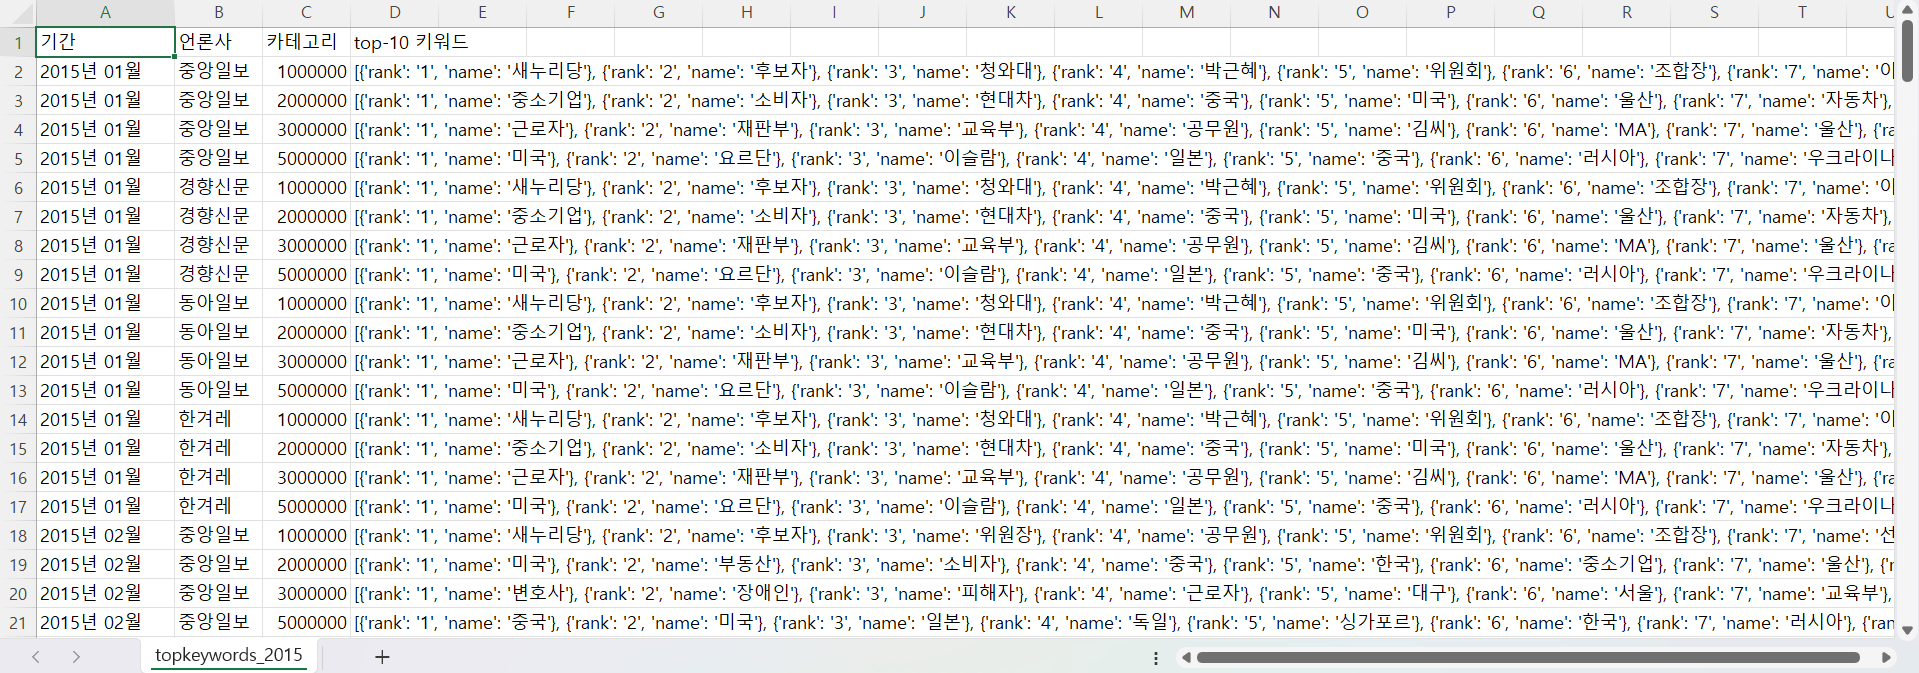

# [그 외 참고자료]

빅카인즈 API 응용

1. open ai 라이브러리 활용

  - pip install openai
  - pip install opanai pandas


2. 빅카인즈 언어자원(형태소분석기 바른, 언어모델 KPF-BERT) 활용
  - 깃허브, 허깅페이스, 빅카인즈랩 페이지 등에 기술 공개

  형태소분석기 바른: https://bareun.ai/
  - (대표홈페이지) https://bareun.ai/
  - (바른 깃허브) https://github.com/bareun-nlp/bareunpy
  - (재단 깃허브) https://github.com/KPF-bigkinds/Bareun-NLP_PY

  언어모델 KPF-BERT
  - (KPF-BERT 깃허브) https://github.com/KPF-bigkinds/KPF-BERT
  - (KPF 허깅페이스) https://huggingface.co/KPF/KPF-bert-ner

3. 깃허브 응용

  - https://github.com/KPF-bigkinds?tab=repositories
  - 21년도 해커톤 대상 수상작: https://github.com/KPF-bigkinds/Hackathon-2021


4. 별첨 참조

  - OpenAPI_사용자지침서_V1.47
  - 공공데이터 활용사례집 - OPEN API 중심으로